# Choosing a machine learning algorithm

We’ll create our machine learning pipeline based on a random forest classifier. This method is well suited as our data set will be comprised of a mix of strong and weak features. While the weak features will sometimes be helpful, the random forest method will ensure we don’t create a model that only fits our training data.

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# tag::imports[]
from sklearn.ensemble import RandomForestClassifier
# end::imports[]

We can create our classifier with the following code:

In [4]:
# Load the CSV files saved in the train/test notebook

df_train_under = pd.read_csv("data/df_train_under_all.csv")
df_test_under = pd.read_csv("data/df_test_under_all.csv")

In [5]:
df_train_under.sample(5)

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient,sp,sl
89668,11860,28403,1,1.000,40.000,12.000,4,4,0.143,0.400,0.000,0.000
132376,145558,145559,1,2.000,9.000,4.000,3,3,1.000,1.000,1.000,1.000
8244,228243,165937,0,0.000,224.000,36.000,7,375,0.250,0.987,0.000,0.000
14171,213941,122694,0,0.000,6.000,5.000,1,3,1.000,1.000,1.000,0.000
34042,11655,20664,0,0.000,36.000,15.000,3,66,1.000,1.000,0.000,0.000


In [6]:
df_test_under.sample(5)

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient,sp,sl
93632,123439,123440,1,4.000,25.000,6.000,10,10,1.000,1.000,1.000,1.000
36603,1971,179348,0,1.000,49.000,49.000,0,274,0.000,0.230,1.000,1.000
136050,195589,242868,1,6.000,49.000,8.000,21,21,1.000,1.000,1.000,1.000
4843,71861,35970,0,1.000,24.000,13.000,1,6,0.106,1.000,0.000,0.000
8084,170158,160895,0,3.000,144.000,37.000,3,256,0.433,0.667,1.000,1.000


In [7]:
# tag::create-classifier[]
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)
# end::create-classifier[]

In [8]:
# tag::train-model[]
columns = [
    "cn", "pa", "tn", # graph features
    "minTriangles", "maxTriangles", "minCoefficient", "maxCoefficient", # triangle features  
    "sp", "sl" # community features
]

X = df_train_under[columns]
y = df_train_under["label"]
classifier.fit(X, y)
# end::train-model[]

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=0)

In [9]:
# tag::evaluation-imports[]
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
# end::evaluation-imports[]

# tag::evaluation-functions[]
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall"],
        "Score": [accuracy_score(actual, predictions), 
                  precision_score(actual, predictions), 
                  recall_score(actual, predictions)]
    })
# end::evaluation-functions[]

def feature_importance(columns, classifier):        
    display("Feature Importance")
    df = pd.DataFrame({
        "Feature": columns,
        "Importance": classifier.feature_importances_
    })
    df = df.sort_values("Importance", ascending=False)    
    ax = df.plot(kind='bar', x='Feature', y='Importance', legend=None)
    ax.xaxis.set_label_text("")
    plt.tight_layout()
    plt.show()

In [15]:
# tag::test-model[]
predictions = classifier.predict(df_test_under[columns])
y_test = df_test_under["label"]

evaluate_model(predictions, y_test)
# end::test-model[]

,Measure,Score
0,Accuracy,0.964
1,Precision,0.961
2,Recall,0.967


In [16]:
evaluate_model(predictions, y_test).to_csv("data/model-eval.csv", index=False)

'Feature Importance'

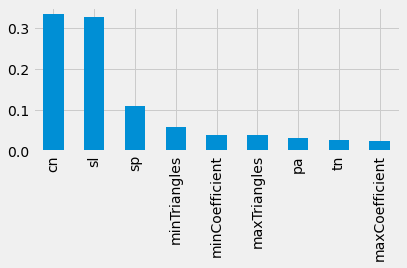

In [12]:
feature_importance(columns, classifier)